In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('../data/train.tsv', delimiter='\t')

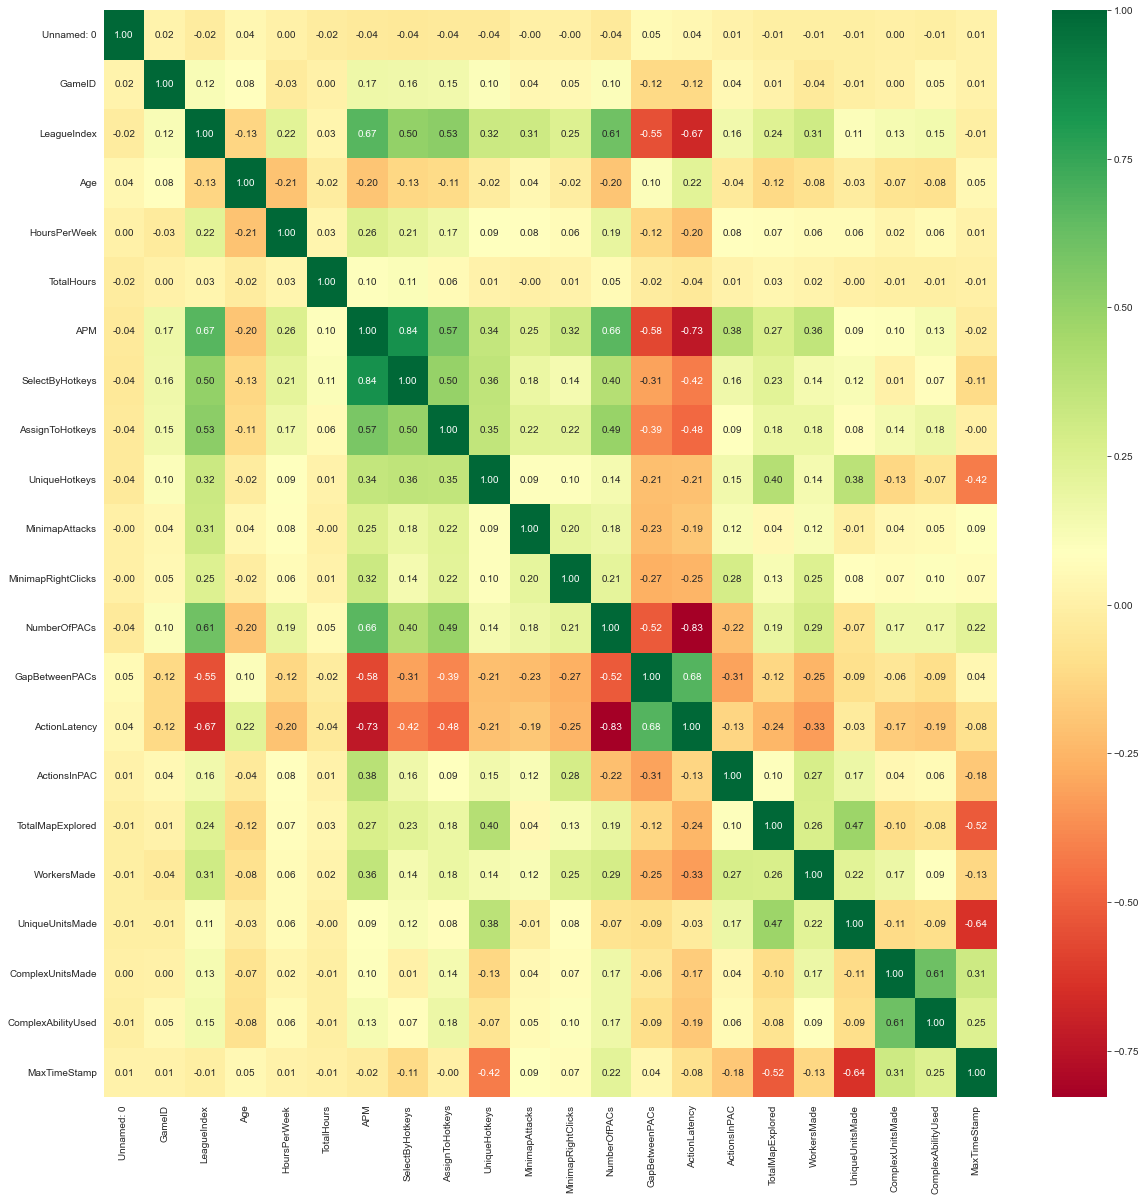

In [3]:
# Correlation matrix
corr = df_train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdYlGn', annot=True, fmt='.2f')
plt.show()